In [16]:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

from astropy.wcs import wcs
import numpy as np
from astropy.io import fits

import cv2

%matplotlib notebook

### Let's have the big picture ( image + grid ) in few calls

<IPython.core.display.Javascript object>


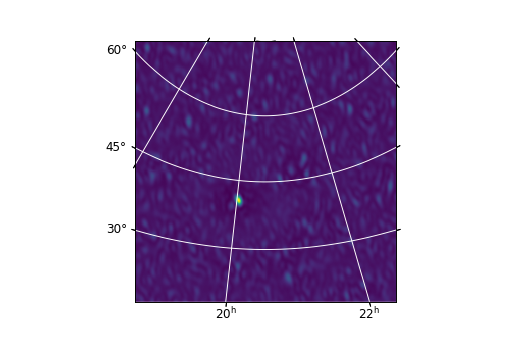

In [17]:
header=fits.getheader('/datartemix/FITS/trash/nenufar.fits')
w=wcs.WCS(header)


fig=plt.figure()
ax=plt.subplot(projection=w)
ax.coords.grid(True, color='w')
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
ax.imshow(fits.getdata('/datartemix/FITS/trash/nenufar.fits'), origin='lower')

naxis1 = header['NAXIS1']
naxis2 = header['NAXIS2']

### And now some code to create the grid as a set of polylines.
The polylines could be returned as the result of a "grid" service by yafitts (for example )

#### Compute angular coordinates (degrees) of all pixels. 
The values are sequentially stored row after row 

In [19]:
m = [[ira, idec] for idec in range(naxis2) for ira in range(naxis1)]
coords = w.wcs_pix2world(np.array(m), 0)

#### Separate the right ascensions and the declinations and store them in separate naxis2 * naxis1 matrices.

In [20]:
ras = np.array([coord[0] for coord in coords]).reshape((naxis2, naxis1))
decs = np.array([coord[1] for coord in coords]).reshape((naxis2, naxis1))

#### Compute contours for ras and decs in their respective matrix.
I.e. for each value ra ( resp. dec ) of a collections of right ascensions ( resp declinations ) ( i.e. contour levels ) 
  look for positions having constants ra ( resp. dec ) 

Each call to the `contourf` method returns a collection (one item per level) of paths ( one level may have more than contour ). 
Each path contains amongst other things the coordinates of the vertices of one contour.

##### The right ascensions

In [21]:
cs_ra = plt.contourf(ras, 11) # I don't know why I have to ask for 11 levels of RA to obtained 4 visible ones, this has to be sorted out

##### The declinations

In [24]:
cs_dec = plt.contourf(decs, 5)

##### A plot facility
it considers the array of collections passed in argument, then for each collection the collections of its paths, then for each path it separates its coordinates in two arrays `x` and `y` which are provided to the `plot` method. 

In [26]:
def plot_cols(cols):
    for icol in range(len(cols)):
        paths = cols[icol].get_paths()
        for ipath in range(len(paths)):
            path = paths[ipath]
            x = [v[0] for v in path.vertices]
            y = [v[1] for v in path.vertices]
            plt.plot(x,y)


##### Let's plot the contours to visualize 

<IPython.core.display.Javascript object>


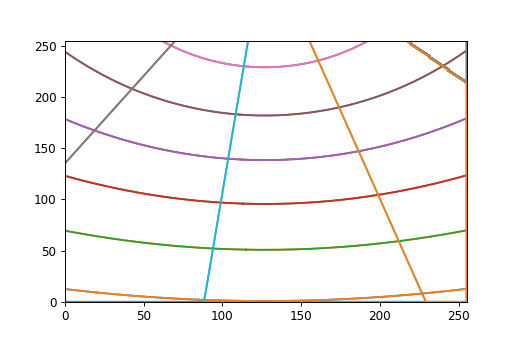

In [27]:

fig, ax = plt.subplots()
ax.set_xlim(0, naxis1-1)
ax.set_ylim(0, naxis2-1)

plot_cols(cs_dec.collections)
plot_cols(cs_ra.collections)

